# Node ranking by PageRank

This notebook illustrates the ranking of ndoes in a graph by [PageRank](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#pagerank).

In [1]:
from numpy import array

## Undirected graphs

In [2]:
from sknetwork.toy_graphs import miserables_graph
from sknetwork.ranking import PageRank

**Loading**

In [3]:
adjacency, labels = miserables_graph(return_labels=True)
adjacency

<77x77 sparse matrix of type '<class 'numpy.int64'>'
	with 508 stored elements in Compressed Sparse Row format>

Find Cosette's node in the graph.

In [4]:
cosette_node = [node for node, name in labels.items() if name=='Cosette'][0]

**Ranking with personalization**

Compute the ranking with a personalization vector set with Cosette.

In [5]:
pr = PageRank()
pr.fit(adjacency,
       personalization=array([(node == cosette_node) for node in range(adjacency.shape[0])]))

PageRank(damping_factor=0.85, method='diter', n_iter=25)

**Visualization**

In [8]:
from networkx import from_scipy_sparse_matrix, draw

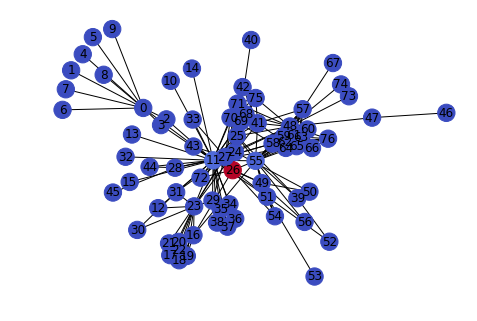

In [9]:
# Warning: If the image does not appear, run the cell again.
draw(from_scipy_sparse_matrix(adjacency), with_labels = True, node_color = pr.ranking_, cmap = 'coolwarm')

**Ranking without personalization**

In [10]:
pr.fit(adjacency)

PageRank(damping_factor=0.85, method='diter', n_iter=25)

**Visualization**

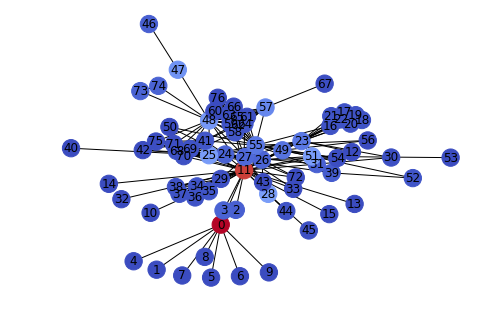

In [11]:
# Warning: If the image does not appear, run the cell again.
draw(from_scipy_sparse_matrix(adjacency), with_labels = True, node_color = pr.ranking_, cmap = 'coolwarm')

## Directed graphs

In [12]:
from sknetwork.toy_graphs import painters_graph

**Loading**

In [13]:
adjacency, names = painters_graph(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

Find Michelangelo's node in the graph.

In [14]:
michelangelo_node = [node for node, name in names.items() if name=='Michelangelo'][0]
michelangelo_node

2

**Ranking with personalization**

In [15]:
pr.fit(adjacency,
       personalization=array([(node == michelangelo_node) for node in range(adjacency.shape[0])]))

PageRank(damping_factor=0.85, method='diter', n_iter=25)

**Visualization**

In [16]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

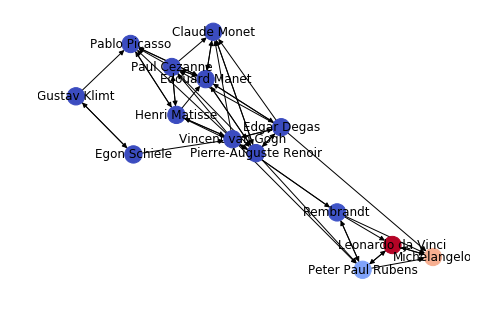

In [17]:
# Warning: If the image does not appear, run the cell again.
draw(from_scipy_sparse_matrix(adjacency,create_using=DiGraph()),
     labels = names,
     node_color = pr.ranking_,
     cmap = 'coolwarm')

**Ranking without personalization**

In [18]:
pr.fit(adjacency)

PageRank(damping_factor=0.85, method='diter', n_iter=25)

**Visualization**

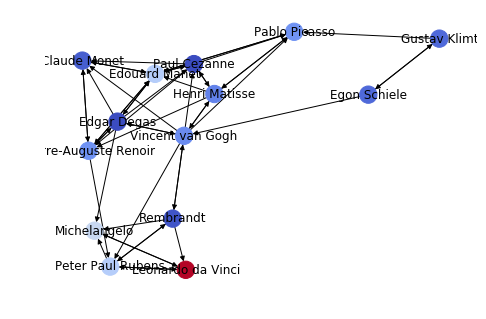

In [19]:
# Warning: If the image does not appear, run the cell again.
draw(from_scipy_sparse_matrix(adjacency,create_using=DiGraph()),
     labels = names,
     node_color = pr.ranking_,
     cmap = 'coolwarm')

## Bipartite graphs

In [20]:
from sknetwork.toy_graphs import movie_actor_graph
from sknetwork.utils import bipartite2undirected

**Loading**

In [21]:
biadjacency, movies, actors = movie_actor_graph(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

Find Aviator's node in the graph.

In [22]:
aviator_node = [node for node, name in movies.items() if name=='Aviator'][0]
aviator_node

9

In [23]:
adjacency = bipartite2undirected(biadjacency)

**Ranking with personalization**

In [24]:
pr.fit(adjacency,
       personalization=array([(node == aviator_node) for node in range(adjacency.shape[0])]))

PageRank(damping_factor=0.85, method='diter', n_iter=25)

**Visualization**

In [25]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [26]:
graph = from_scipy_sparse_matrix(adjacency)

In [27]:
n,p = biadjacency.shape
pos = {i: (0,i) for i in range(n)}
pos.update({n + i: (2,i) for i in range(p)})

In [28]:
pos_labels = {i: (0.5,i) for i in range(n)}
pos_labels.update({n + i: (1.5,i) for i in range(p)})

In [29]:
names = movies
names.update({n + i: actors[i] for i in actors})

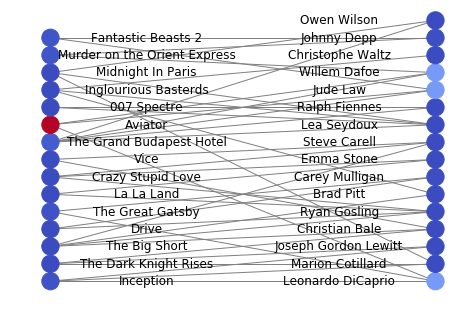

In [30]:
# Warning: If the image does not appear, run the cell again.
draw(graph, 
     pos = pos, 
     edge_color = 'grey',
     node_color = pr.ranking_, 
     cmap = 'coolwarm')
show_labels = draw_networkx_labels(graph,
                                   pos_labels,
                                   labels = names)

**Ranking without personalization**

In [31]:
pr.fit(adjacency)

PageRank(damping_factor=0.85, method='diter', n_iter=25)

**Visualization**

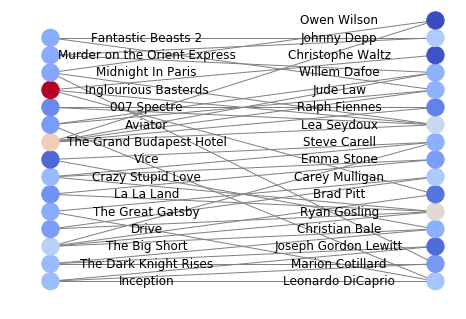

In [32]:
# Warning: If the image does not appear, run the cell again.
draw(graph, 
     pos = pos, 
     edge_color = 'grey',
     node_color = pr.ranking_, 
     cmap = 'coolwarm')
show_labels = draw_networkx_labels(graph,
                                   pos_labels,
                                   labels = names)